Предварительная обработка данных-Бинаризация-Исключение среднего-Масштабирование-Нормализация

In [1]:
import numpy as np
from sklearn import preprocessing

# Исходная матрица наблюдений
source_matrix = np.array([[5.2, -3.1, 3.4],
                          [-1.3, 7.9, -6.2],
                          [4.0, 0.5, 2.2],
                          [7.4, -10.0, -4.6]])

# Преобразование в бинарный формат
binarized_result = preprocessing.Binarizer(threshold=2.2).transform(source_matrix)
print("\nБинаризованные данные:\n", binarized_result)

# Статистика исходных данных
print("\nИСХОДНЫЕ ДАННЫЕ:")
print("Среднее значение =", source_matrix.mean(axis=0))
print("Стандартное отклонение =", source_matrix.std(axis=0))

# Стандартизация с нулевым средним
standardized_data = preprocessing.scale(source_matrix)
print("\nПОСЛЕ СТАНДАРТИЗАЦИИ:")
print("Среднее значение =", standardized_data.mean(axis=0))
print("Стандартное отклонение =", standardized_data.std(axis=0))

# Приведение к заданному диапазону
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_minmax = minmax_scaler.fit_transform(source_matrix)
print("\nДанные после масштабирования MinMax:\n", scaled_minmax)

# Нормирование различными методами
normalized_l1 = preprocessing.normalize(source_matrix, norm='l1')
normalized_l2 = preprocessing.normalize(source_matrix, norm='l2')
print("\nНормированные данные (L1 норма):\n", normalized_l1)
print("\nНормированные данные (L2 норма):\n", normalized_l2)


Бинаризованные данные:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

ИСХОДНЫЕ ДАННЫЕ:
Среднее значение = [ 3.825 -1.175 -1.3  ]
Стандартное отклонение = [3.20029296 6.45653738 4.16052881]

ПОСЛЕ СТАНДАРТИЗАЦИИ:
Среднее значение = [-5.55111512e-17 -5.55111512e-17 -5.55111512e-17]
Стандартное отклонение = [1. 1. 1.]

Данные после масштабирования MinMax:
 [[0.74712644 0.38547486 1.        ]
 [0.         1.         0.        ]
 [0.6091954  0.58659218 0.875     ]
 [1.         0.         0.16666667]]

Нормированные данные (L1 норма):
 [[ 0.44444444 -0.26495726  0.29059829]
 [-0.08441558  0.51298701 -0.4025974 ]
 [ 0.59701493  0.07462687  0.32835821]
 [ 0.33636364 -0.45454545 -0.20909091]]

Нормированные данные (L2 норма):
 [[ 0.74891888 -0.44647087  0.48967773]
 [-0.1283798   0.78015417 -0.61227289]
 [ 0.87100711  0.10887589  0.47905391]
 [ 0.5579228  -0.75394973 -0.34681688]]


Кодирование меток

In [ ]:
import numpy as np
from sklearn import preprocessing

# Набор исходных категориальных меток
initial_tags = ['синий', 'коричневый', 'синий', 'зеленый', 'коричневый', 'оранжевый', 'серый']

# Создание преобразователя меток и обучение на данных
converter = preprocessing.LabelEncoder()
converter.fit(initial_tags)

# Отображение соответствий меток и чисел
print("\nСоответствие меток и кодов:")
for index, tag in enumerate(converter.classes_):
    print(tag, '→', index)

# Преобразование новых меток в числовые коды
sample_tags = ['зеленый', 'синий', 'коричневый']
coded_values = converter.transform(sample_tags)
print("\nМетки =", sample_tags)
print("Закодированные значения =", list(coded_values))

# Восстановление исходных меток из числовых кодов
coded_sequence = [3, 0, 4, 1]
restored_tags = converter.inverse_transform(coded_sequence)
print("\nЗакодированная последовательность =", coded_sequence)
print("Восстановленные метки =", list(restored_tags))

Логистический классификатор

c:\Users\napst\Desktop\Book\DataSciencePactice\venv_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


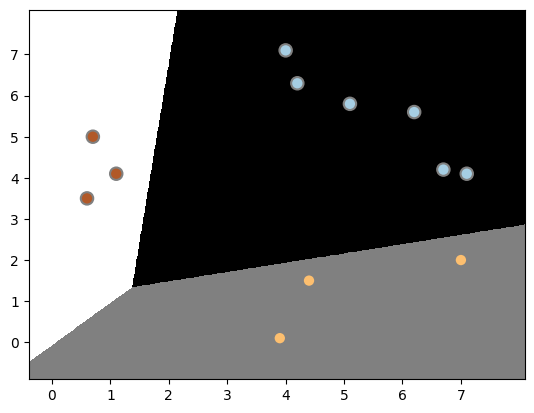

In [2]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt

from utilities import visualize_classifier

# Подготовка обучающих примеров
feature_matrix = np.array([[4.2, 6.3], [5.1, 5.8], [4.0, 7.1], [6.2, 5.6], [7.1, 4.1], [6.7, 4.2], [4.4, 1.5], [7.0, 2.0], [3.9, 0.1], [0.6, 3.5], [1.1, 4.1], [0.7, 5.0]])
target_vector = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Инициализация модели логистической регрессии
model = linear_model.LogisticRegression(solver='liblinear', C=1)
# Альтернативный вариант: model = linear_model.LogisticRegression(solver='liblinear', C=100)

# Обучение модели на данных
model.fit(feature_matrix, target_vector)

# Графическое представление результатов классификации
visualize_classifier(model, feature_matrix, target_vector)

Наивный байесовский классификатор

Точность модели наивного Байеса = 99.43 %


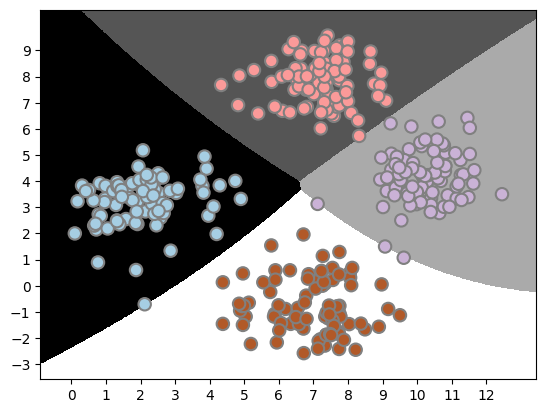

Точность новой модели = 96.59 %


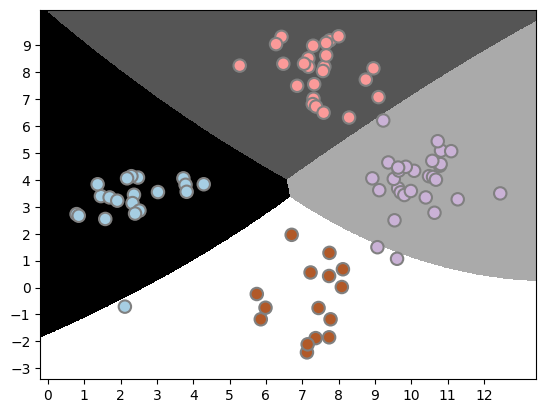

Accuracy (кросс-валидация): 99.15%
Precision: 99.18%
Recall: 99.15%
F1-score: 99.15%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

from utilities import visualize_classifier

# Файл с исходными данными
input_data_path = 'data_multivar_nb.txt'

# Импорт данных из файла
dataset = np.loadtxt(input_data_path, delimiter=',')
features, labels = dataset[:, :-1], dataset[:, -1]

# Инициализация модели Байеса
model = GaussianNB()

# Обучение модели
model.fit(features, labels)

# Предсказание для обучающей выборки
predicted_labels = model.predict(features)

# Оценка точности модели
model_accuracy = 100.0 * (labels == predicted_labels).sum() / features.shape[0]
print("Точность модели наивного Байеса =", round(model_accuracy, 2), "%")

# Визуализация результатов классификации
visualize_classifier(model, features, labels)

###############################################
# Кросс-валидация

# Разделение данных на обучающую и тестовую части
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(features, labels, test_size=0.25, random_state=7)
new_model = GaussianNB()
new_model.fit(X_train_split, y_train_split)
y_test_predicted = new_model.predict(X_test_split)

# Расчет точности новой модели
new_accuracy = 100.0 * (y_test_split == y_test_predicted).sum() / X_test_split.shape[0]
print("Точность новой модели =", round(new_accuracy, 2), "%")

# Визуализация работы классификатора
visualize_classifier(new_model, X_test_split, y_test_split)

###############################################
# Метрики оценки

k_folds = 4
accuracy_scores = cross_val_score(model,
        features, labels, scoring='accuracy', cv=k_folds)
print("Accuracy (кросс-валидация): " + str(round(100*accuracy_scores.mean(), 2)) + "%")

precision_scores = cross_val_score(model,
        features, labels, scoring='precision_weighted', cv=k_folds)
print("Precision: " + str(round(100*precision_scores.mean(), 2)) + "%")

recall_scores = cross_val_score(model,
        features, labels, scoring='recall_weighted', cv=k_folds)
print("Recall: " + str(round(100*recall_scores.mean(), 2)) + "%")

f1_scores = cross_val_score(model,
        features, labels, scoring='f1_weighted', cv=k_folds)
print("F1-score: " + str(round(100*f1_scores.mean(), 2)) + "%")

Матрица неточностей

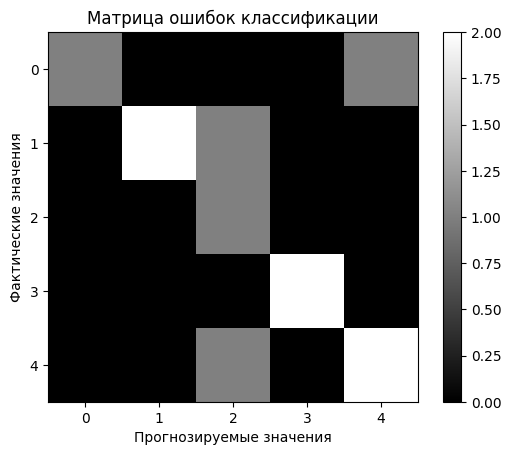


               precision    recall  f1-score   support

 Категория-0       1.00      0.50      0.67         2
 Категория-1       1.00      0.67      0.80         3
 Категория-2       0.33      1.00      0.50         1
 Категория-3       1.00      1.00      1.00         2
 Категория-4       0.67      0.67      0.67         3

    accuracy                           0.73        11
   macro avg       0.80      0.77      0.73        11
weighted avg       0.85      0.73      0.75        11



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Инициализация фактических меток класса
actual = [3, 1, 1, 3, 0, 0, 2, 1, 4, 4, 4]
# Инициализация предсказанных меток класса
pred = [3, 2, 1, 3, 0, 4, 2, 1, 2, 4, 4]

# Вычисление матрицы ошибок
matrix = confusion_matrix(actual, pred)

# Визуализация матрицы ошибок
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.title('Матрица ошибок классификации')
plt.colorbar()
positions = np.arange(5)
plt.xticks(positions, positions)
plt.yticks(positions, positions)
plt.ylabel('Фактические значения')
plt.xlabel('Прогнозируемые значения')
plt.show()

# Генерация детализированного отчета
labels = ['Категория-0', 'Категория-1', 'Категория-2', 'Категория-3', 'Категория-4']
print('\n', classification_report(actual, pred, target_names=labels))

Классификация данных о доходах 
с помощью машин опорных векторов

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Файл с данными
filename = 'income_data.txt'

# Чтение данных
features_data = []
labels_data = []
category_one_counter = 0
category_two_counter = 0
max_records = 25000

with open(filename, 'r') as file_handle:
    for line_content in file_handle.readlines():
        if category_one_counter >= max_records and category_two_counter >= max_records:
            break

        if '?' in line_content:
            continue

        row_values = line_content[:-1].split(', ')

        if row_values[-1] == '<=50K' and category_one_counter < max_records:
            features_data.append(row_values)
            category_one_counter += 1

        if row_values[-1] == '>50K' and category_two_counter < max_records:
            features_data.append(row_values)
            category_two_counter += 1

# Преобразование в numpy массив
features_array = np.array(features_data)

# Конвертация строковых данных в числовые
encoders_list = []
transformed_array = np.empty(features_array.shape)

for column_index, column_value in enumerate(features_array[0]):
    if column_value.isdigit():
        transformed_array[:, column_index] = features_array[:, column_index]
    else:
        encoders_list.append(preprocessing.LabelEncoder())
        transformed_array[:, column_index] = encoders_list[-1].fit_transform(features_array[:, column_index])

input_features = transformed_array[:, :-1].astype(int)
output_labels = transformed_array[:, -1].astype(int)

# Создание классификатора SVM
svm_model = OneVsOneClassifier(LinearSVC(random_state=42))

# Обучение классификатора
svm_model.fit(input_features, output_labels)

# Разделение данных для валидации
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    input_features, output_labels, test_size=0.25, random_state=7
)

svm_model = OneVsOneClassifier(LinearSVC(random_state=42))
svm_model.fit(X_train_split, y_train_split)
predictions_test = svm_model.predict(X_test_split)

# Вычисление F1 score
f1_scores = cross_val_score(svm_model, input_features, output_labels, scoring='f1_weighted', cv=4)
print("F1 оценка модели: " + str(round(100*f1_scores.mean(), 2)) + "%")

# Тестовый пример для предсказания
sample_input = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married',
               'Handlers-cleaners', 'Not-in-family', 'White', 'Male',
               '0', '0', '40', 'United-States']

# Кодирование тестового примера
encoded_sample = [-1] * len(sample_input)
encoder_counter = 0

for feature_index, feature_value in enumerate(sample_input):
    if feature_value.isdigit():
        encoded_sample[feature_index] = int(sample_input[feature_index])
    else:
        # Кодирование категориальных признаков
        encoded_sample[feature_index] = int(encoders_list[encoder_counter].transform([sample_input[feature_index]])[0])
        encoder_counter += 1

# Подготовка данных для предсказания
final_input = np.array(encoded_sample).reshape(1, -1)

# Получение предсказания
predicted_label = svm_model.predict(final_input)
print("Результат предсказания: " + encoders_list[-1].inverse_transform(predicted_label)[0])

F1 оценка модели: 75.95%
Результат предсказания: <=50K


Создание регрессора одной переменной 

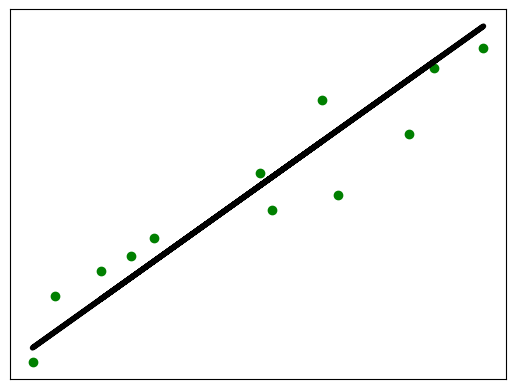

Производительность линейного регрессора:
Средняя абсолютная ошибка = 0.61
Среднеквадратичная ошибка = 0.48
Медианная абсолютная ошибка = 0.52
Объясненная дисперсия = 0.86
Коэффициент детерминации R² = 0.86

Новая средняя абсолютная ошибка = 0.61


In [2]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Входной файл, содержащий данные 
input_file = 'data_singlevar_regr.txt' 

# Загрузка данных 
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Разделение данных на обучающий и тестовый наборы 
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Обучающие данные 
X_train, y_train = X[:num_training], y[:num_training]

# Тестовые данные 
X_test, y_test = X[num_training:], y[num_training:]

# Создание объекта линейного регрессора 
regressor = linear_model.LinearRegression()

# Обучение модели с использованием обучающего набора
regressor.fit(X_train, y_train)

# Прогнозирование результата 
y_test_pred = regressor.predict(X_test)

# Построение графика 
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Вычисление метрических характеристик 
print("Производительность линейного регрессора:")
print("Средняя абсолютная ошибка =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Среднеквадратичная ошибка =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Медианная абсолютная ошибка =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Объясненная дисперсия =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("Коэффициент детерминации R² =", round(sm.r2_score(y_test, y_test_pred), 2))

# Файл для сохранения модели 
output_model_file = 'model.pkl'

# Сохранение модели 
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Загрузка модели
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Получение прогноза на тестовом наборе данных 
y_test_pred_new = regressor_model.predict(X_test)
print("\nНовая средняя абсолютная ошибка =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

Создание многомерного регрессора

In [7]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

# Входной файл, содержащий данные
input_file = 'data_multivar_regr.txt'

# Загрузка данных
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Разделение данных на обучающую и тестовую выборки
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Обучающие данные
X_train, y_train = X[:num_training], y[:num_training]

# Тестовые данные
X_test, y_test = X[num_training:], y[num_training:]

# Создание модели линейной регрессии
linear_regressor = linear_model.LinearRegression()

# Обучение модели с использованием обучающего набора
linear_regressor.fit(X_train, y_train)

# Прогнозирование результата
y_test_pred = linear_regressor.predict(X_test)

# Оценка метрических характеристик 
print("Производительность линейной регрессии:")
print("Средняя абсолютная ошибка =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Среднеквадратичная ошибка =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Медианная абсолютная ошибка =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Объясненная дисперсия =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("Коэффициент детерминации R² =", round(sm.r2_score(y_test, y_test_pred), 2))

# Полиномиальная регрессия 
polynomial = PolynomialFeatures(degree=10)
X_train_transformed = polynomial.fit_transform(X_train)
datapoint = [[7.75, 6.35, 5.56]]
poly_datapoint = polynomial.fit_transform(datapoint)

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print("\nЛинейная регрессия:\n", linear_regressor.predict(datapoint))
print("\nПолиномиальная регрессия:\n", poly_linear_model.predict(poly_datapoint))

Производительность линейной регрессии:
Средняя абсолютная ошибка = 3.58
Среднеквадратичная ошибка = 20.31
Медианная абсолютная ошибка = 2.99
Объясненная дисперсия = 0.86
Коэффициент детерминации R² = 0.86

Линейная регрессия:
 [36.05286276]

Полиномиальная регрессия:
 [41.08240428]


Оценка стоимости недвижимости с использованием регрессора на основе машины опорных векторов

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

# Создаем синтетические данные для регрессии
np.random.seed(7)
n_samples = 506  # такое же количество, как в оригинальном Boston dataset
n_features = 13  # такое же количество признаков, как в оригинале

X = np.random.randn(n_samples, n_features) * 10 + 5
# Создаем целевую переменную с некоторой зависимостью от признаков
y = (X[:, 0] * 0.5 +
     X[:, 1] * 1.2 +
     X[:, 2] * (-0.8) +
     X[:, 5] * 0.3 +
     np.random.randn(n_samples) * 5)

# Перемешивание данных
X, y = shuffle(X, y, random_state=7)

# Разделение данных на обучающую и тестовую выборки
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Создание регрессионной модели на основе SVM
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Обучение SVM регрессора
sv_regressor.fit(X_train, y_train)

# Тестирование модели
y_test_pred = sv_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
print("\n#### Производительность модели ####")
print("Среднеквадратичная ошибка =", round(mse, 2))
print("Объясненная дисперсия =", round(evs, 2))

# Тестирование на тестовой точке (используем оригинальные 13 признаков)
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print("\nПредсказанная цена:", sv_regressor.predict([test_data])[0])


#### Производительность модели ####
Среднеквадратичная ошибка = 19.9
Объясненная дисперсия = 0.93

Предсказанная цена: -23.80158956311991
